In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from statistics import mean
from sklearn.preprocessing import OrdinalEncoder

rng = np.random.default_rng()

In [2]:
onlineShopping_df = pd.read_csv("accuracyOnlineShopping.csv", index_col=0)

model_names = onlineShopping_df.columns

In [3]:
onlineShopping_df

,KNeighborsClassifier,SVC,DecisionTreeClassifier,RandomForestClassifier,MLPClassifier,GradientBoostingClassifier
0,0.885645,0.881590,0.894566,0.907543,0.903487,0.878345
1,0.888078,0.890511,0.900243,0.907543,0.906732,0.894566
2,0.885645,0.884023,0.894566,0.895377,0.897810,0.669100
3,0.888078,0.878345,0.892944,0.897810,0.891322,0.871857
4,0.901054,0.892133,0.915653,0.916464,0.922141,0.896999
5,0.882401,0.880779,0.893755,0.899432,0.896188,0.857259
6,0.888078,0.879157,0.892944,0.898621,0.887267,0.879968
7,0.885645,0.880779,0.899432,0.905109,0.901865,0.881590
8,0.884023,0.888078,0.891322,0.896999,0.894566,0.879968
9,0.890511,0.895377,0.897810,0.909976,0.904298,0.843471


# Paired t-student Statistics (Online Shopping Intention Dataset)

In [6]:
model_combinations = []

for mod1 in model_names:
    for mod2 in model_names:
        if mod1 != mod2 and not ((mod2,mod1) in model_combinations):
            model_combinations.append((mod1,mod2))
            
model_combinations

[('KNeighborsClassifier', 'SVC'),
 ('KNeighborsClassifier', 'DecisionTreeClassifier'),
 ('KNeighborsClassifier', 'RandomForestClassifier'),
 ('KNeighborsClassifier', 'MLPClassifier'),
 ('KNeighborsClassifier', 'GradientBoostingClassifier'),
 ('SVC', 'DecisionTreeClassifier'),
 ('SVC', 'RandomForestClassifier'),
 ('SVC', 'MLPClassifier'),
 ('SVC', 'GradientBoostingClassifier'),
 ('DecisionTreeClassifier', 'RandomForestClassifier'),
 ('DecisionTreeClassifier', 'MLPClassifier'),
 ('DecisionTreeClassifier', 'GradientBoostingClassifier'),
 ('RandomForestClassifier', 'MLPClassifier'),
 ('RandomForestClassifier', 'GradientBoostingClassifier'),
 ('MLPClassifier', 'GradientBoostingClassifier')]

In [7]:
onlineShopping_model_averages = {}
for mod in model_names:
    onlineShopping_model_averages[mod] = onlineShopping_df[mod].mean()    
#onlineShopping_model_averages

onlineShopping_model_std = {}
for mod in model_names:
    onlineShopping_model_std[mod] = np.std(onlineShopping_df[mod])    
#onlineShopping_model_std

In [8]:
onlineShopping_stats = {}
onlineShopping_stats['avg'] = onlineShopping_model_averages
onlineShopping_stats['stdev'] = onlineShopping_model_std
onlineShopping_stats = pd.DataFrame().from_dict(onlineShopping_stats)

onlineShopping_stats

,avg,stdev
KNeighborsClassifier,0.887916,0.004904
SVC,0.885077,0.005701
DecisionTreeClassifier,0.897324,0.006719
RandomForestClassifier,0.903487,0.006529
MLPClassifier,0.900568,0.009234
GradientBoostingClassifier,0.855312,0.063881


In [9]:
model_combination_averages = {}
model_combination_t_value = {}
model_combination_p_value = {}
model_combincation_reject = {}

for (mod1,mod2) in model_combinations:
    model_combination_averages[mod1+" - "+mod2] = onlineShopping_model_averages[mod1] - onlineShopping_model_averages[mod2]
    test = stats.ttest_rel(onlineShopping_df[mod1], onlineShopping_df[mod2])
    model_combination_t_value[mod1+" - "+mod2] = test[0]
    model_combination_p_value[mod1+" - "+mod2] = test[1]
    model_combincation_reject[mod1+" - "+mod2] = test[1] < 0.05
    
combination_stats = {}
combination_stats['avg'] = model_combination_averages
combination_stats['t_value'] = model_combination_t_value
combination_stats['p_value'] = model_combination_p_value
combination_stats['reject?'] = model_combincation_reject
combination_stats_df = pd.DataFrame().from_dict(combination_stats)

combination_stats_df

,avg,t_value,p_value,reject?
KNeighborsClassifier - SVC,0.002839,1.655032,0.132303,False
KNeighborsClassifier - DecisionTreeClassifier,-0.009408,-8.582787,0.000013,True
KNeighborsClassifier - RandomForestClassifier,-0.015572,-10.778129,0.000002,True
KNeighborsClassifier - MLPClassifier,-0.012652,-5.829994,0.000250,True
KNeighborsClassifier - GradientBoostingClassifier,0.032603,1.554692,0.154441,False
SVC - DecisionTreeClassifier,-0.012247,-6.092211,0.000181,True
SVC - RandomForestClassifier,-0.018410,-10.335993,0.000003,True
SVC - MLPClassifier,-0.015491,-6.767454,0.000082,True
SVC - GradientBoostingClassifier,0.029765,1.398993,0.195321,False
DecisionTreeClassifier - RandomForestClassifier,-0.006164,-4.878750,0.000873,True


In [10]:
combination_stats_df.to_csv("tTest.csv")

In [11]:
# Generated for the Report

outputString = ""

for i in range(len(model_combinations)):
    mod1 = model_combinations[i][0]
    mod2 = model_combinations[i][1]
    outputString = outputString+mod1+" & "+mod2+' & %.5f & %.5f & %.5f' % (combination_stats_df['avg'][i],combination_stats_df['t_value'][i],combination_stats_df['p_value'][i])+' & '+str(combination_stats_df['reject?'][i])+' \\\ \\hline \n'
    
print(outputString)

KNeighborsClassifier & SVC & 0.00284 & 1.65503 & 0.13230 & False \\ \hline 
KNeighborsClassifier & DecisionTreeClassifier & -0.00941 & -8.58279 & 0.00001 & True \\ \hline 
KNeighborsClassifier & RandomForestClassifier & -0.01557 & -10.77813 & 0.00000 & True \\ \hline 
KNeighborsClassifier & MLPClassifier & -0.01265 & -5.82999 & 0.00025 & True \\ \hline 
KNeighborsClassifier & GradientBoostingClassifier & 0.03260 & 1.55469 & 0.15444 & False \\ \hline 
SVC & DecisionTreeClassifier & -0.01225 & -6.09221 & 0.00018 & True \\ \hline 
SVC & RandomForestClassifier & -0.01841 & -10.33599 & 0.00000 & True \\ \hline 
SVC & MLPClassifier & -0.01549 & -6.76745 & 0.00008 & True \\ \hline 
SVC & GradientBoostingClassifier & 0.02976 & 1.39899 & 0.19532 & False \\ \hline 
DecisionTreeClassifier & RandomForestClassifier & -0.00616 & -4.87875 & 0.00087 & True \\ \hline 
DecisionTreeClassifier & MLPClassifier & -0.00324 & -2.37171 & 0.04179 & True \\ \hline 
DecisionTreeClassifier & GradientBoostingClassi

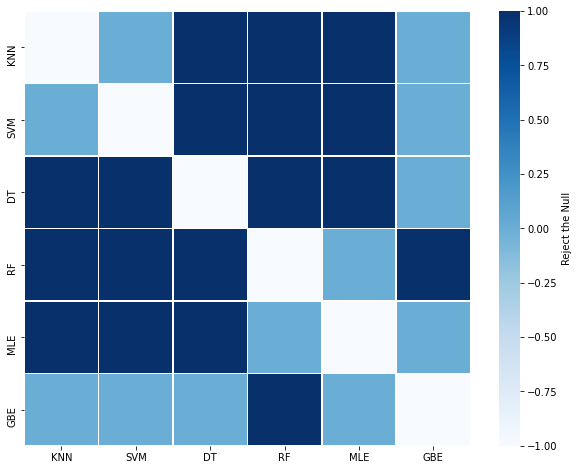

In [12]:
rejectionMatrix = [[-1,0,1,1,1,0],[0,-1,1,1,1,0],[1,1,-1,1,1,0],[1,1,1,-1,0,1],[1,1,1,0,-1,0],[0,0,0,1,0,-1]]
axis_labels = ['KNN', 'SVM', 'DT', 'RF','MLE','GBE']


plt.figure(figsize=(10,8))
sns.heatmap(rejectionMatrix, linewidth=0.5, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels, cbar_kws={'label': 'Reject the Null'})
plt.savefig('tTestMatrix.pdf')
